In [35]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib as mpl
import torch
import torch.nn.functional as F
from torch.autograd import Variable

In [36]:
random_imgs = np.load('./random/random_imgs.npy')
random_labs = np.load('./random/random_labs.npy')
random_imgs = random_imgs.astype(np.float32)
random_labs = random_labs.astype(np.float32)

random_imgs = random_imgs.reshape(-1,16)
random_labs = random_labs.reshape(-1,1)
print(random_imgs.shape)
print(random_labs.shape)
x_torch = Variable(torch.from_numpy(random_imgs))
y_torch = Variable(torch.from_numpy(random_labs))
print(x_torch.shape[0])

(64, 16)
(64, 1)
64


In [37]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model,self).__init__()
        self.l1 = torch.nn.Linear(4*4,4)
        self.l2 = torch.nn.Linear(4,1)
        self.sigmoid = torch.nn.Sigmoid()
        
    def forward(self,x):
        fc_1 = self.l1(x)
        fc_1_ac = self.sigmoid(fc_1)
        fc_2 = self.l2(fc_1_ac)
        y_pred = self.sigmoid(fc_2)
        return y_pred
    
model = Model()

for m in model.modules():
    if isinstance(m,torch.nn.Linear):
        torch.nn.init.normal(m.weight,mean=0,std=0.1)
        torch.nn.init.constant(m.bias,0.1)
        
criterion = torch.nn.BCELoss(size_average = True)
optimizer = torch.optim.SGD(model.parameters(),lr=0.1)    

loss_array = []
accuracy_array = []
for epoch in range(5000):
    outputs = model(x_torch)
    loss = criterion(outputs, y_torch)

    y_pred = outputs.clone()
    y_pred[y_pred>=0.5] = 1
    y_pred[y_pred<0.5] = 0
    acc = torch.sum(torch.isclose(y_pred,y_torch)).item()/y_torch.shape[0]
    if epoch % 100 == 0:
        print(epoch,loss.item())
        print(epoch,acc)
    
    loss_array.append(loss)
    accuracy_array.append(acc)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
#     running_loss = 0.0
#     running_accuracy = 0.0
#     for i in range(x_torch.shape[0]):
#         outputs = model(x_torch[i])
#         loss = criterion(outputs, y_torch[i])
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
#         running_loss += loss.item()
#         outputs = (outputs>=0.5).float()
#         if(outputs == y_torch[i]):
#             running_accuracy += 1

/Users/cacikkong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: nn.init.normal is now deprecated in favor of nn.init.normal_.
/Users/cacikkong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
/Users/cacikkong/anaconda3/lib/python3.6/site-packages/torch/nn/_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='mean' instead.
  warnings.warn(warning.format(ret))


0 0.7738035917282104
0 0.171875
100 0.4583474397659302
100 0.828125
200 0.4500255882740021
200 0.828125
300 0.4398536682128906
300 0.828125
400 0.428114652633667
400 0.828125
500 0.4153958559036255
500 0.828125
600 0.40201646089553833
600 0.828125
700 0.38805824518203735
700 0.828125
800 0.3736160099506378
800 0.828125
900 0.35892680287361145
900 0.828125
1000 0.3443267047405243
1000 0.828125
1100 0.3301325738430023
1100 0.828125
1200 0.31655219197273254
1200 0.828125
1300 0.30366218090057373
1300 0.828125
1400 0.29143980145454407
1400 0.828125
1500 0.27981311082839966
1500 0.84375
1600 0.2687039375305176
1600 0.84375
1700 0.2580513060092926
1700 0.859375
1800 0.2478186935186386
1800 0.875
1900 0.23798945546150208
1900 0.875
2000 0.22855794429779053
2000 0.90625
2100 0.21952052414417267
2100 0.90625
2200 0.2108706533908844
2200 0.921875
2300 0.20259693264961243
2300 0.9375
2400 0.1946837455034256
2400 0.9375
2500 0.18711304664611816
2500 0.9375
2600 0.17986634373664856
2600 0.9375
2700

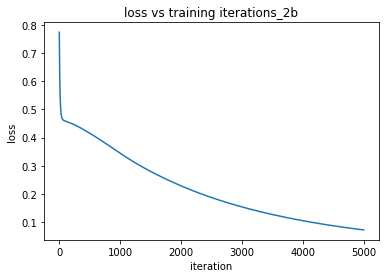

In [38]:
x = np.arange(0,5000,1)
y = loss_array
fig = plt.figure()
plt.plot(x,y)
plt.title('loss vs training iterations_2b')
plt.xlabel('iteration')
plt.ylabel('loss')
plt.savefig('2b_loss')

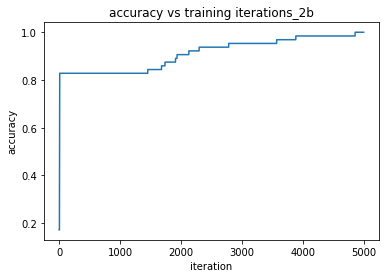

In [39]:
x = np.arange(0,5000,1)
y = accuracy_array
fig = plt.figure()
plt.plot(x,y)
plt.title('accuracy vs training iterations_2b')
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.savefig('2b_accuracy')